---
# Problem 2 (Python)

1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv
2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.
3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.
4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?
5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram
6. Are there any missing values? If so, impute as necessary and explain your approach.
7. Standardize (zero mean) the numeric variables, and determine if there are any outliers.
8. Summarize your findings.

Summarization and overall explanation located at the end of the notebook.

---

In [5]:
# 1. 1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv

# Reading the data file

import pandas as pd

nutrition_subset = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

In [6]:
# 1. Displaying the table

nutrition_subset

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [7]:
# 3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat.

nutrition_subset.sort_values(by=['saturated_fat'], ascending=False).iloc[0:5]

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [8]:
# 4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat by the weight in grams.

nutrition_subset['saturated_fat_per_gram'] = nutrition_subset['saturated_fat'] / nutrition_subset['weight_in_grams']

# Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food items highest in saturated fat per gram.

nutrition_subset.sort_values(by=['saturated_fat_per_gram'], ascending=False).iloc[0:5]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


In [9]:
# 5. Standardize (zero mean) the field saturated_ fat_ per_gram

from scipy import stats

nutrition_subset['scaled_saturated_fat_per_gram'] = stats.zscore(nutrition_subset.saturated_fat_per_gram, nan_policy='omit')

In [10]:
# 5. Produce a listing of all the food items that are outliers at the high end of the scale.

nutrition_subset[nutrition_subset['scaled_saturated_fat_per_gram'] > 3]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460,4.240676
448,COCONUT; RAW; SHREDDED 1 CUP,80.00,23.8,0,0.297500,3.938687
492,COCONUT; DRIED; SWEETND;SHREDD1 CUP,93.00,29.3,0,0.315054,4.204266
576,COCONUT; RAW; PIECE 1 PIECE,45.00,13.4,0,0.297778,3.942889
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310,7.082741
890,LARD 1 CUP,205.00,80.4,195,0.392195,5.371375
898,FATS; COOKING/VEGETBL SHORTENG1 TBSP,13.00,3.3,0,0.253846,3.278227
899,LARD 1 TBSP,13.00,5.1,12,0.392308,5.373078
907,FATS; COOKING/VEGETBL SHORTENG1 CUP,205.00,51.3,0,0.250244,3.223726


In [11]:
# 5. How many food items are outliers at the low end of the scale?

# Find the number of outliers on the low end of scaled_saturated_fat_per_gram and print it
low_end_outliers = nutrition_subset['scaled_saturated_fat_per_gram'] < 3
print("The number of outliers on the low end of the scale:", sum(low_end_outliers))

# Produce a listing of all food items that are outliers at the low end of the scale
nutrition_subset[nutrition_subset['scaled_saturated_fat_per_gram'] < 3]

The number of outliers on the low end of the scale: 946


,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000,-0.562335
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219,-0.135401
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000,-0.562335
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476,2.319472
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000,2.327397
...,...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000,-0.562335
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000,-0.562335
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000,-0.562335
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000,-0.562335


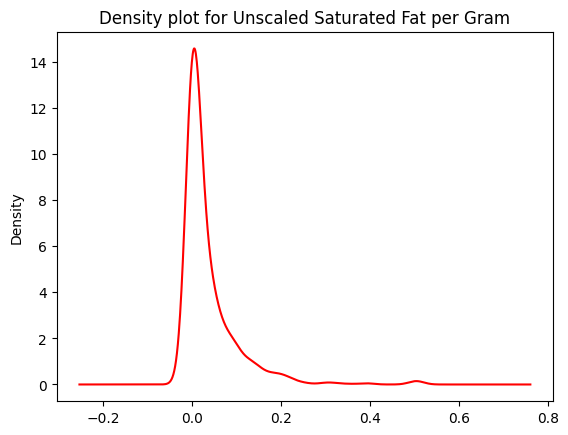

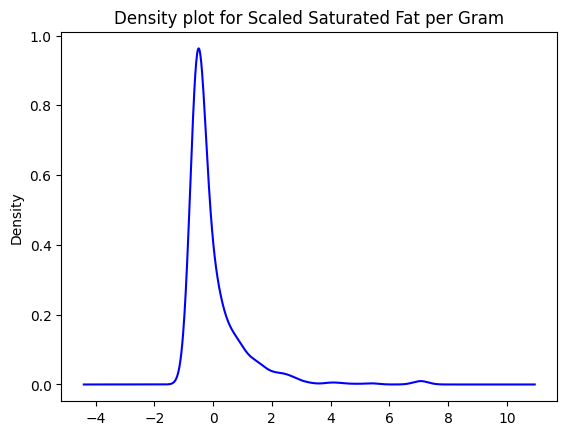

In [12]:
# 5. Create a density plot for saturated_ fat_ per_gram

import matplotlib.pyplot as plt

# Using the saturated_fat_per_gram variable created eralier
nutrition_subset.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated Fat per Gram')
plt.show()

nutrition_subset.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled Saturated Fat per Gram')
plt.show()

In [16]:
# 6. Checking if there are any missing values

# Checks by using the isnull() and any() functions
nutrition_subset.isnull().values.any()

False

In [14]:
# 7. Standardize (zero mean) the numeric variables.

from scipy import stats

# Standardizing the values
nutrition_subset['scaled_weight_in_grams'] = stats.zscore(nutrition_subset.weight_in_grams, nan_policy='omit')
nutrition_subset['scaled_saturated_fat'] = stats.zscore(nutrition_subset.saturated_fat, nan_policy='omit')
nutrition_subset['scaled_cholesterol'] = stats.zscore(nutrition_subset.cholesterol, nan_policy='omit')

# Determining if there are any outliers.
scaled_weight_in_grams_outliers = (nutrition_subset['scaled_weight_in_grams'] > 3) | (nutrition_subset['scaled_weight_in_grams'] < -3)
scaled_saturated_fat_outliers = (nutrition_subset['scaled_saturated_fat'] > 3) | (nutrition_subset['scaled_saturated_fat'] < -3)
scaled_cholesterol_outliers = (nutrition_subset['scaled_cholesterol'] > 3) | (nutrition_subset['scaled_cholesterol'] < -3)

# Print the number of outliers for each scaled variable
print ("There are", sum(scaled_weight_in_grams_outliers), "outliers for scaled_weight_in_grams.")
print ("There are", sum(scaled_saturated_fat_outliers), "outliers for scaled_weight_in_grams.")
print ("There are", sum(scaled_cholesterol_outliers), "outliers for scaled_weight_in_grams.")

There are 22 outliers for scaled_weight_in_grams.
There are 20 outliers for scaled_weight_in_grams.
There are 17 outliers for scaled_weight_in_grams.


---
## 8. Summarize your findings.
---
1. I created the table using the url and displayed it.
2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.
3. I sorted the dataset by saturated_fat in descending order using the sort_values() function and found the top five food items in saturated fat: CHEESECAKE 1 CAKE, ICE CREAM; VANLLA; RICH 16% FT1/2 GAL, YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE, CREME PIE 1 PIE, LARD 1 CUP. Comparing food items of different sizes may not lead to conclusive information if it is the only factor being considered. Other factors should be taken into consideration such as what the food is made out of or where it came from. The size in food may not be the most important factor when comparing them, so it should not be the only factor being taken into account.
4. I created a new variable called saturated_fat_per_gram by dividing the amount of saturated fat by the weight in grams. I then sorted the data set by this new variable and found the top 5 highest food items in this variable. The highest that had the most saturated fat per gram was both **salted and unsalted butter**.
5. I standardized the data using the scipy.stats.zscore function. I produced a list of both the high and low end outliers. The number of food items that are outliers at the low end of the scale is **946**. I then created a density table for both the scaled and unscaled values of saturated_fat_per_gram. It coinsides with the data and confirms that there are many outliers on the left end of the field.
6. I checked if the data set had any missing values by checking if any values were null using the isnull() and any() functions. There did not appear to be any missing values.
7. I assumed that we were only working with the variables weight_in_grams, saturated_fat, and cholesterol for this question since we already standardized saturated_fat_per_gram previously. I standardized these variables using the scipy.stats.zscore function. I then determined if there were any outliers by using the 3 standard deviation rule and summing the number of outliers found. There did appear to be outliers within the original data set. I found 22, 20, and 17 outliers within the respective scaled columns.
---